<a href="https://colab.research.google.com/github/Thasneem-vazim/Lab-programs-sem-2/blob/main/Depression_detection%20edited%20code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
np.random.seed(13)
file=pd.read_csv("/content/Copy of Survey (Responses) - Form Responses 1 (2).csv")
x=file[["1) Sadness","2) Discouragement","3) Low self-esteem","4) Inferiority","5) Guilt","6) Indecisiveness","7) Irritability","8) Loss of interest in life","9) Loss of motivation","10) Poor self-image","11) Appetite changes","12) Sleep changes","13) Loss of positivity","14) Hypochondriasis","15) Suicidal impulses"]]
y=file["Class"]

In [ ]:
print(file.shape)

(206, 22)


In [ ]:
file.describe()

,1) Sadness,2) Discouragement,3) Low self-esteem,4) Inferiority,5) Guilt,6) Indecisiveness,7) Irritability,8) Loss of interest in life,9) Loss of motivation,10) Poor self-image,11) Appetite changes,12) Sleep changes,13) Loss of positivity,14) Hypochondriasis,15) Suicidal impulses,Total
count,206.000000,206.000000,206.000000,206.000000,206.00000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,1.368932,1.092233,1.024272,1.242718,1.26699,1.412621,1.223301,0.995146,1.330097,1.194175,1.092233,1.218447,1.014563,1.097087,0.747573,17.300971
std,0.632306,1.000604,0.975001,0.941882,0.95334,0.877711,0.936335,0.955077,0.909445,1.045858,0.975924,1.029255,0.944706,0.872502,0.891351,8.785615
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,18.000000
75%,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,23.000000
max,2.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,44.000000


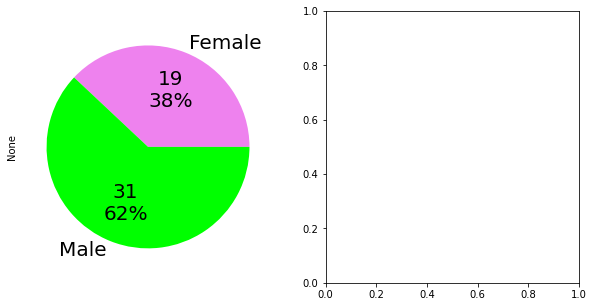

In [ ]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'
N=50;
df = pd.DataFrame({'Gender': np.random.choice(['Male', 'Female'], N)})
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10, 5))
df.groupby('Gender').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                 colors=['violet', 'lime'], ax=ax1)


Text(0, 0.5, 'Frequency')

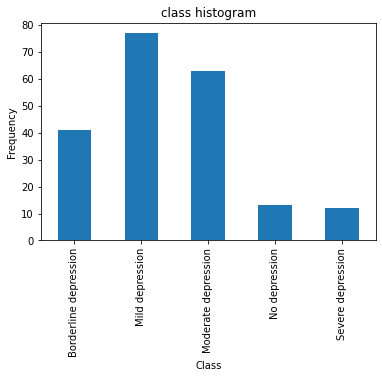

In [ ]:
count_classes = pd.value_counts(file['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2)

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
from sklearn.svm import SVC
SVM=SVC()
SVM.fit(x_train,y_train)

SVC()

In [ ]:
SVM.predict(x_test)

array(['Mild depression', 'Moderate depression', 'Moderate depression',
       'Moderate depression', 'Mild depression', 'Mild depression',
       'Mild depression', 'Borderline depression', 'Mild depression',
       'Borderline depression', 'Moderate depression',
       'Borderline depression', 'Borderline depression',
       'Mild depression', 'Borderline depression', 'Mild depression',
       'Mild depression', 'Borderline depression', 'Mild depression',
       'Borderline depression', 'Moderate depression',
       'Borderline depression', 'Moderate depression',
       'Moderate depression', 'Moderate depression',
       'Moderate depression', 'Moderate depression',
       'Moderate depression', 'Mild depression', 'Moderate depression',
       'Moderate depression', 'Moderate depression', 'Mild depression',
       'Severe depression', 'Moderate depression',
       'Borderline depression', 'Borderline depression',
       'Mild depression', 'Mild depression', 'Borderline depression',


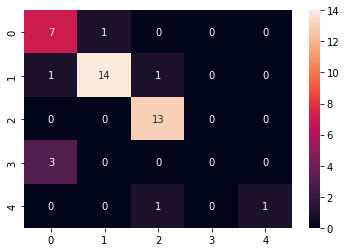

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
y1_predict_test=SVM.predict(x_test)
cm1=confusion_matrix(y_test,y1_predict_test)
import seaborn as sns
sns.heatmap(cm1,annot=True)


In [ ]:
print(classification_report(y_test,y1_predict_test))

                       precision    recall  f1-score   support

Borderline depression       0.64      0.88      0.74         8
      Mild depression       0.93      0.88      0.90        16
  Moderate depression       0.87      1.00      0.93        13
        No depression       0.00      0.00      0.00         3
    Severe depression       1.00      0.50      0.67         2

             accuracy                           0.83        42
            macro avg       0.69      0.65      0.65        42
         weighted avg       0.79      0.83      0.80        42



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB=MultinomialNB()
NB.fit(x_train,y_train)

MultinomialNB()

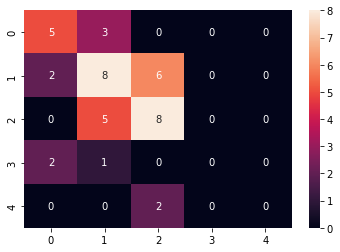

In [ ]:
y2_predict_test=NB.predict(x_test)
cm2=confusion_matrix(y_test,y2_predict_test)
sns.heatmap(cm2,annot=True)

In [ ]:
print(classification_report(y_test,y2_predict_test))

                       precision    recall  f1-score   support

Borderline depression       0.56      0.62      0.59         8
      Mild depression       0.47      0.50      0.48        16
  Moderate depression       0.50      0.62      0.55        13
        No depression       0.00      0.00      0.00         3
    Severe depression       0.00      0.00      0.00         2

             accuracy                           0.50        42
            macro avg       0.31      0.35      0.32        42
         weighted avg       0.44      0.50      0.47        42



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.naive_bayes import BernoulliNB
BNBmodel = BernoulliNB()
BNBmodel.fit(x_train, y_train)


BernoulliNB()

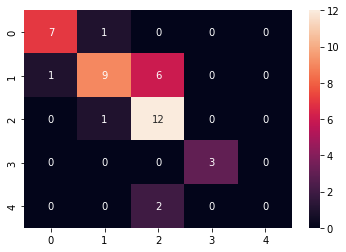

In [ ]:
y3_predict_test=BNBmodel.predict(x_test)
cm1=confusion_matrix(y_test,y3_predict_test)
sns.heatmap(cm1,annot=True)

In [ ]:
print(classification_report(y_test,y3_predict_test))

                       precision    recall  f1-score   support

Borderline depression       0.88      0.88      0.88         8
      Mild depression       0.82      0.56      0.67        16
  Moderate depression       0.60      0.92      0.73        13
        No depression       1.00      1.00      1.00         3
    Severe depression       0.00      0.00      0.00         2

             accuracy                           0.74        42
            macro avg       0.66      0.67      0.65        42
         weighted avg       0.74      0.74      0.72        42



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT=DT.fit(x_train,y_train)

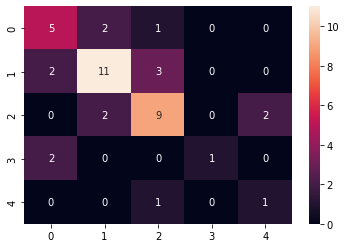

In [ ]:
y4_predict_test=DT.predict(x_test)
cm4=confusion_matrix(y_test,y4_predict_test)
sns.heatmap(cm4,annot=True)

In [ ]:
print(classification_report(y_test,y4_predict_test))

                       precision    recall  f1-score   support

Borderline depression       0.56      0.62      0.59         8
      Mild depression       0.73      0.69      0.71        16
  Moderate depression       0.64      0.69      0.67        13
        No depression       1.00      0.33      0.50         3
    Severe depression       0.33      0.50      0.40         2

             accuracy                           0.64        42
            macro avg       0.65      0.57      0.57        42
         weighted avg       0.67      0.64      0.64        42



In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100)
RF.fit(x_train, y_train)

RandomForestClassifier()

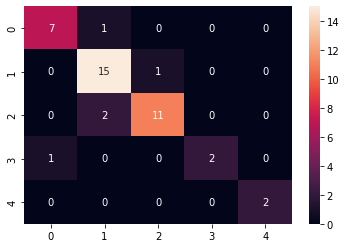

In [ ]:
y5_predict_test=RF.predict(x_test)
cm4=confusion_matrix(y_test,y5_predict_test)
sns.heatmap(cm4,annot=True)

In [ ]:
print(classification_report(y_test,y5_predict_test))

                       precision    recall  f1-score   support

Borderline depression       0.88      0.88      0.88         8
      Mild depression       0.83      0.94      0.88        16
  Moderate depression       0.92      0.85      0.88        13
        No depression       1.00      0.67      0.80         3
    Severe depression       1.00      1.00      1.00         2

             accuracy                           0.88        42
            macro avg       0.93      0.87      0.89        42
         weighted avg       0.89      0.88      0.88        42



In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
params = {
 'objective':'binary:logistic',
 'max_depth': 4, 'min_child_weight': 12, 'gamma': 0.3, 'subsample': 0.6,
 'colsample_bytree': 0.6, 'scale_pos_weight': 1,
 'alpha': 0.05,
 'learning_rate': 0.03,
 'n_estimators':1484,'seed': 27
 }
xgb_clf = XGBClassifier(**params)
xgb_clf.fit(x_train,y_train)

XGBClassifier(alpha=0.05, colsample_bytree=0.6, gamma=0.3, learning_rate=0.03,
              max_depth=4, min_child_weight=12, n_estimators=1484,
              objective='multi:softprob', seed=27, subsample=0.6)

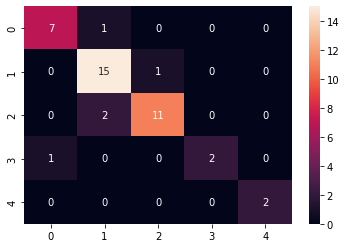

In [ ]:
yxg_pred=RF.predict(x_test)
cm4=confusion_matrix(y_test,yxg_pred)
sns.heatmap(cm4,annot=True)

In [ ]:
print(classification_report(y_test,yxg_pred))

                       precision    recall  f1-score   support

Borderline depression       0.88      0.88      0.88         8
      Mild depression       0.83      0.94      0.88        16
  Moderate depression       0.92      0.85      0.88        13
        No depression       1.00      0.67      0.80         3
    Severe depression       1.00      1.00      1.00         2

             accuracy                           0.88        42
            macro avg       0.93      0.87      0.89        42
         weighted avg       0.89      0.88      0.88        42



In [ ]:
from tensorflow import keras
model_dnn = keras.models.Sequential()
model_dnn.add(keras.layers.Dense(units = 12, activation = 'relu',input_shape= x_train.shape[1:]))
model_dnn.add(keras.layers.Dense(units = 10, activation = 'relu'))
model_dnn.add(keras.layers.Dense(units = 8, activation = 'relu'))
model_dnn.add(keras.layers.Dense(units = 6, activation = 'relu'))
model_dnn.add(keras.layers.Dense(units = 6, activation = 'relu'))
model_dnn.add(keras.layers.Dense(units = 3, activation = 'sigmoid'))
model_dnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                192       
                                                                 
 dense_7 (Dense)             (None, 10)                130       
                                                                 
 dense_8 (Dense)             (None, 8)                 88        
                                                                 
 dense_9 (Dense)             (None, 6)                 54        
                                                                 
 dense_10 (Dense)            (None, 6)                 42        
                                                                 
 dense_11 (Dense)            (None, 3)                 21        
                                                                 
Total params: 527
Trainable params: 527
Non-trainable 

In [ ]:
model_dnn.compile(loss='sparse_categorical_crossentropy',optimizer ='adam', metrics = ['accuracy'])


In [ ]:
model_dnn.fit(x=x_train,y=y_train,epochs=2,batch_size=16)

Epoch 1/2


UnimplementedError: ignored

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
  
knn = KNeighborsClassifier(n_neighbors = 1)
  
knn.fit(x_train, y_train)
y6_pred = knn.predict(x_test)
y6_pred

array(['Mild depression', 'Moderate depression', 'Moderate depression',
       'Moderate depression', 'Mild depression', 'Mild depression',
       'Mild depression', 'No depression', 'Mild depression',
       'Borderline depression', 'Moderate depression', 'No depression',
       'No depression', 'Borderline depression', 'Borderline depression',
       'Mild depression', 'Mild depression', 'Borderline depression',
       'Borderline depression', 'Borderline depression',
       'Mild depression', 'Borderline depression', 'Moderate depression',
       'Moderate depression', 'Moderate depression',
       'Moderate depression', 'Moderate depression', 'Severe depression',
       'Mild depression', 'Mild depression', 'Severe depression',
       'Moderate depression', 'Borderline depression',
       'Severe depression', 'Moderate depression', 'No depression',
       'No depression', 'Mild depression', 'Moderate depression',
       'No depression', 'Mild depression', 'Mild depression'],
      

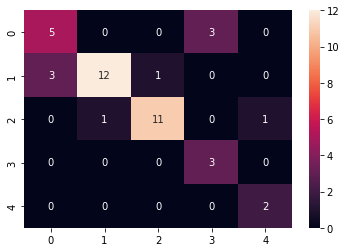

In [ ]:
cm4=confusion_matrix(y_test,y6_pred)
sns.heatmap(cm4,annot=True)

In [ ]:
print(classification_report(y_test,y6_pred))

                       precision    recall  f1-score   support

Borderline depression       0.62      0.62      0.62         8
      Mild depression       0.92      0.75      0.83        16
  Moderate depression       0.92      0.85      0.88        13
        No depression       0.50      1.00      0.67         3
    Severe depression       0.67      1.00      0.80         2

             accuracy                           0.79        42
            macro avg       0.73      0.84      0.76        42
         weighted avg       0.82      0.79      0.79        42



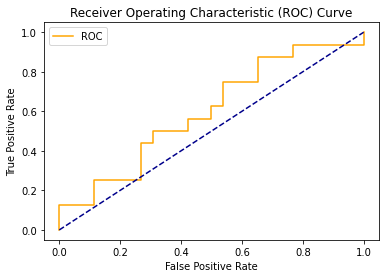

In [ ]:
probs = NB.predict_proba(x_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs,pos_label='Mild depression')
plot_roc_curve(fpr, tpr)

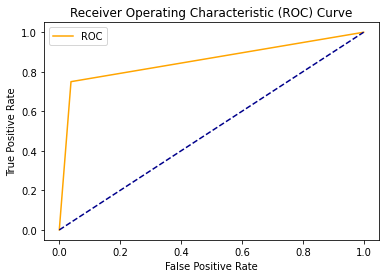

In [ ]:
probs = knn.predict_proba(x_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs,pos_label='Mild depression')
plot_roc_curve(fpr, tpr)

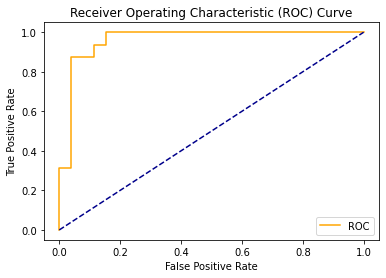

In [ ]:
probs = RF.predict_proba(x_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs,pos_label='Mild depression')
plot_roc_curve(fpr, tpr)

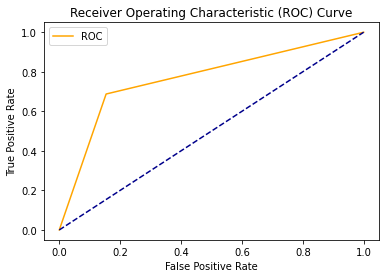

In [ ]:
probs = DT.predict_proba(x_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs,pos_label='Mild depression')
plot_roc_curve(fpr, tpr)

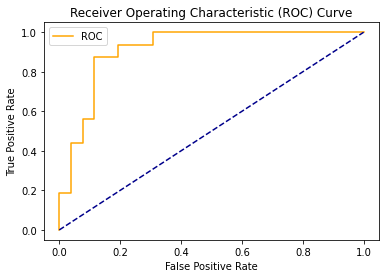

In [ ]:
probs = BNBmodel.predict_proba(x_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs,pos_label='Mild depression')
plot_roc_curve(fpr, tpr)